In [184]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
path = "/"  #Insert path here
database = path + 'database.sqlite'

In [185]:
conn = sqlite3.connect("Downloads/database_europe/database.sqlite")

country = pd.read_sql("""SELECT *
                        FROM Country""", conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [186]:
leagues_by_season = pd.read_sql("""SELECT League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal+away_team_goal) AS avg_goals_per_match,
                                        avg(home_team_goal) as avg_home_goals,
                                        avg(away_team_goal) as avg_away_goals,
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE league_name IN ('England Premier League','France Ligue 1','Germany 1. Bundesliga','Italy Serie A','Spain LIGA BBVA')
                                GROUP BY League.name, season
                                HAVING number_of_teams >=18 AND number_of_stages>=34
                                ORDER BY Country.name, League.name, season ASC
                                ;""", conn)

In [187]:
leagues_by_season

,league_name,season,number_of_stages,number_of_teams,avg_goals_per_match,avg_home_goals,avg_away_goals,total_goals
0,England Premier League,2008/2009,38,20,2.478947,1.400000,1.078947,942
1,England Premier League,2009/2010,38,20,2.771053,1.697368,1.073684,1053
2,England Premier League,2010/2011,38,20,2.797368,1.623684,1.173684,1063
3,England Premier League,2011/2012,38,20,2.805263,1.589474,1.215789,1066
4,England Premier League,2012/2013,38,20,2.797368,1.557895,1.239474,1063
5,England Premier League,2013/2014,38,20,2.768421,1.573684,1.194737,1052
6,England Premier League,2014/2015,38,20,2.565789,1.473684,1.092105,975
7,England Premier League,2015/2016,38,20,2.700000,1.492105,1.207895,1026
8,France Ligue 1,2008/2009,38,20,2.257895,1.286842,0.971053,858
9,France Ligue 1,2009/2010,38,20,2.410526,1.389474,1.021053,916


In [188]:
season_8_9 = leagues_by_season[leagues_by_season['season']=='2008/2009']
season_9_10 = leagues_by_season[leagues_by_season['season']=='2009/2010']
season_10_11 = leagues_by_season[leagues_by_season['season']=='2010/2011']
season_11_12 = leagues_by_season[leagues_by_season['season']=='2011/2012']
season_12_13 = leagues_by_season[leagues_by_season['season']=='2012/2013']
season_13_14 = leagues_by_season[leagues_by_season['season']=='2013/2014']
season_14_15 = leagues_by_season[leagues_by_season['season']=='2014/2015']
season_15_16 = leagues_by_season[leagues_by_season['season']=='2015/2016']

In [189]:
season_8_9

,league_name,season,number_of_stages,number_of_teams,avg_goals_per_match,avg_home_goals,avg_away_goals,total_goals
0,England Premier League,2008/2009,38,20,2.478947,1.400000,1.078947,942
8,France Ligue 1,2008/2009,38,20,2.257895,1.286842,0.971053,858
16,Germany 1. Bundesliga,2008/2009,34,18,2.921569,1.699346,1.222222,894
24,Italy Serie A,2008/2009,38,20,2.600000,1.521053,1.078947,988
32,Spain LIGA BBVA,2008/2009,38,20,2.897368,1.660526,1.236842,1101


In [190]:
season_8_9 = season_8_9.sort_values(['avg_home_goals','avg_away_goals'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_8_9 , x='league_name' , y='avg_home_goals', title='Top Leagues 2008/2009 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [191]:
season_9_10 = season_9_10.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_9_10 , x='league_name' , y='avg_goals_per_match',title='Top Leagues 2009/2010 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [192]:
season_10_11 = season_10_11.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_10_11 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2010/2011 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [193]:
season_11_12 = season_11_12.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_11_12 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2011/2012 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [194]:
season_12_13 = season_12_13.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_12_13 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2012/2013 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [195]:
season_13_14 = season_13_14.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_13_14 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2013/2014 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [196]:
season_14_15 = season_14_15.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_14_15 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2014/2015 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [197]:
season_15_16 = season_15_16.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_15_16 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2015/2016 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

In [198]:
season_15_16 = season_15_16.sort_values(['avg_goals_per_match'], ascending=False)[['league_name','avg_goals_per_match','avg_home_goals','avg_away_goals']].copy()
fig = px.bar(season_15_16 , x='league_name' , y='avg_goals_per_match', title='Top Leagues 2015/2016 Season')
fig.update_xaxes(title_text='League')
fig.update_yaxes(title_text='Average Goals Per Match')

fig.show()

<AxesSubplot:xlabel='league_name'>

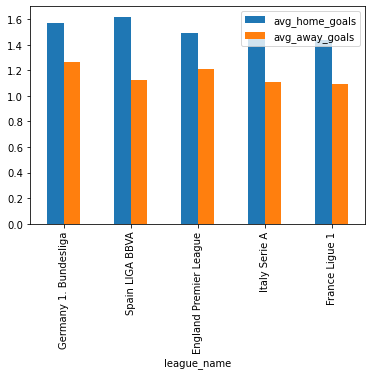

In [199]:
season_15_16.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

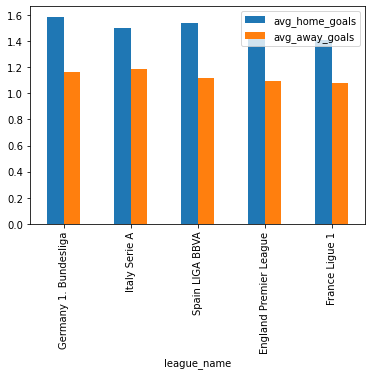

In [200]:
season_14_15.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

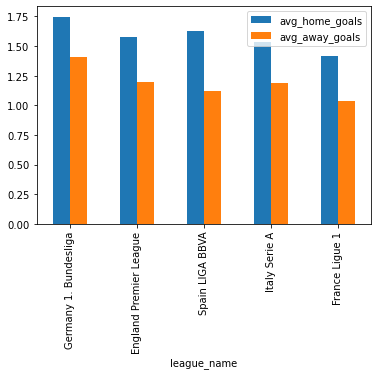

In [201]:
season_13_14.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

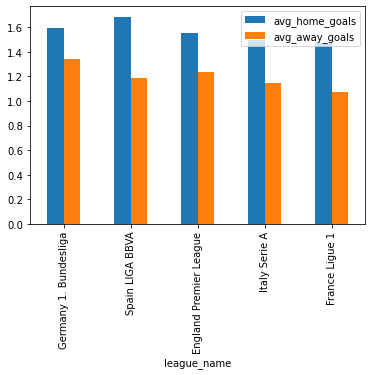

In [202]:
season_12_13.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

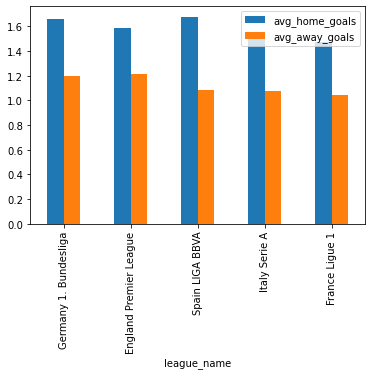

In [203]:
season_11_12.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

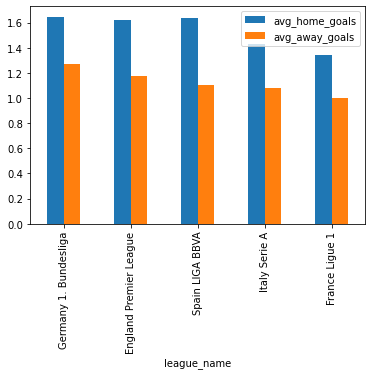

In [204]:
season_10_11.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

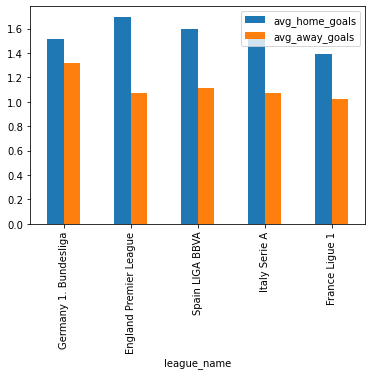

In [205]:
season_9_10.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

<AxesSubplot:xlabel='league_name'>

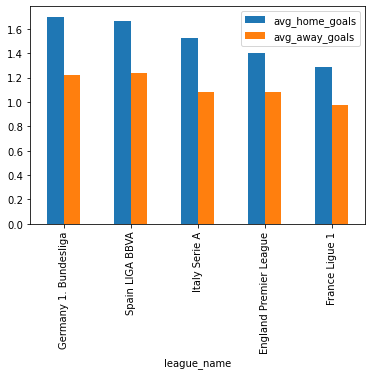

In [206]:
season_8_9.plot(x="league_name", y=["avg_home_goals", "avg_away_goals"], kind="bar")

In [207]:
matches = pd.read_sql ("""SELECT
                            C.name AS country,
                            L.name AS league,
                            season,
                            date,
                            H.team_long_name As home_team,
                            P1.player_name AS home_player1,
                            P2.player_name AS home_player2,
                            P3.player_name AS home_player3,
                            P4.player_name AS home_player4,
                            P5.player_name AS home_player5,
                            P6.player_name AS home_player6,
                            P7.player_name AS home_player7,
                            P8.player_name AS home_player8,
                            P9.player_name AS home_player9,
                            P10.player_name AS home_player10,
                            P11.player_name AS home_player11
                            FROM Match AS M
                            JOIN League AS L ON L.id = M.league_id
                            JOIN Country AS C ON C.id = M.country_id
                            LEFT JOIN Team AS H ON H.team_api_id=M.home_team_api_id
                            LEFT JOIN Player AS P1 ON P1.player_api_id = M.home_player_1
                            LEFT JOIN Player AS P2 ON P2.player_api_id = M.home_player_2
                            LEFT JOIN Player AS P3 ON P3.player_api_id = M.home_player_3
                            LEFT JOIN Player AS P4 ON P4.player_api_id = M.home_player_4
                            LEFT JOIN Player AS P5 ON P5.player_api_id = M.home_player_5
                            LEFT JOIN Player AS P6 ON P6.player_api_id = M.home_player_6
                            LEFT JOIN Player AS P7 ON P7.player_api_id = M.home_player_7
                            LEFT JOIN Player AS P8 ON P8.player_api_id = M.home_player_8
                            LEFT JOIN Player AS P9 ON P9.player_api_id = M.home_player_9
                            LEFT JOIN Player AS P10 ON P10.player_api_id = M.home_player_10
                            LEFT JOIN Player AS P11 ON P11.player_api_id = M.home_player_11
                            ORDER by date""",conn)


In [208]:
matches

,country,league,season,date,home_team,home_player1,home_player2,home_player3,home_player4,home_player5,home_player6,home_player7,home_player8,home_player9,home_player10,home_player11
0,Switzerland,Switzerland Super League,2008/2009,2008-07-18 00:00:00,BSC Young Boys,None,None,None,None,None,None,None,None,None,None,None
1,Switzerland,Switzerland Super League,2008/2009,2008-07-19 00:00:00,FC Aarau,None,None,None,None,None,None,None,None,None,None,None
2,Switzerland,Switzerland Super League,2008/2009,2008-07-20 00:00:00,FC Luzern,None,None,None,None,None,None,None,None,None,None,None
3,Switzerland,Switzerland Super League,2008/2009,2008-07-20 00:00:00,Neuchâtel Xamax,None,None,None,None,None,None,None,None,None,None,None
4,Switzerland,Switzerland Super League,2008/2009,2008-07-23 00:00:00,FC Basel,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,2015/2016,2016-05-25 00:00:00,FC Basel,Germano Vailati,Naser Aliji,Eray Cumart,Marek Suchy,Adama Traore,Alexander Fransson,Luca Zuffi,Davide Calla,Matias Emilio Delgado,Birkir Bjarnason,Cedric Itten
25975,Switzerland,Switzerland Super League,2015/2016,2016-05-25 00:00:00,Lugano,Mirko Salvi,Frederic Veseli,Matias Malvino,Orlando Urbano,Goran Jozinovic,Domen Crnigoj,Mario Piccinocchi,Antoine Rey,Ezgjan Alioski,Anastasios Donis,Mattia Bottani
25976,Switzerland,Switzerland Super League,2015/2016,2016-05-25 00:00:00,FC Luzern,David Zibung,Jerome Thiesson,Francois Affolter,Tomislav Puljic,Claudio Lustenberger,Markus Neumayr,Hekuran Kryeziu,Christian Schneuwly,Jakob Jantscher,Jahmir Hyka,Marco Schneuwly
25977,Switzerland,Switzerland Super League,2015/2016,2016-05-25 00:00:00,FC Thun,Francesco Ruberto,Kevin Bigler,Fulvio Sulmoni,Marco Buerki,Stefan Glarner,Gonzalo Zarate,Dennis Hediger,Michael Siegfried,Enrico Schirinzi,Simone Rapp,Ridge Munsy


In [209]:
matches.isnull().sum()

country             0
league              0
season              0
date                0
home_team           0
home_player1     1224
home_player2     1315
home_player3     1281
home_player4     1323
home_player5     1316
home_player6     1325
home_player7     1227
home_player8     1309
home_player9     1273
home_player10    1436
home_player11    1555
dtype: int64

In [210]:
season = matches[matches['season']=='2015/2016']

In [211]:
season.isnull().sum()

country           0
league            0
season            0
date              0
home_team         0
home_player1      7
home_player2     18
home_player3      6
home_player4     22
home_player5     16
home_player6     12
home_player7      8
home_player8     12
home_player9     13
home_player10    23
home_player11    29
dtype: int64

In [212]:
teams = pd.read_sql("""SELECT * 
                         FROM Team """, conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU
